# _Set Up_

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os
from pathlib import Path

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
path = os.getcwd()
path

'/Users/joeai/Springboard/unit17-take-home-challenges/ultimate_technologies'

# _Load in Data_

In [23]:
from ultimate_challenge import analysis

logins_df = analysis.load_data(path)
logins_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [24]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


# _Data Prep_

In [25]:
df = analysis.data_prep(logins_df)

In [27]:
df.head()

,count,time
login_time,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00
1970-01-01 20:30:00,6,1970-01-01 20:30:00
1970-01-01 20:45:00,9,1970-01-01 20:45:00
1970-01-01 21:00:00,7,1970-01-01 21:00:00
1970-01-01 21:15:00,1,1970-01-01 21:15:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 2 columns):
count    9788 non-null int64
time     9788 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 229.4 KB


# _Extract Date Info from `login-df`_

In [30]:
logins_df = analysis.extract_data_info(df)
logins_df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


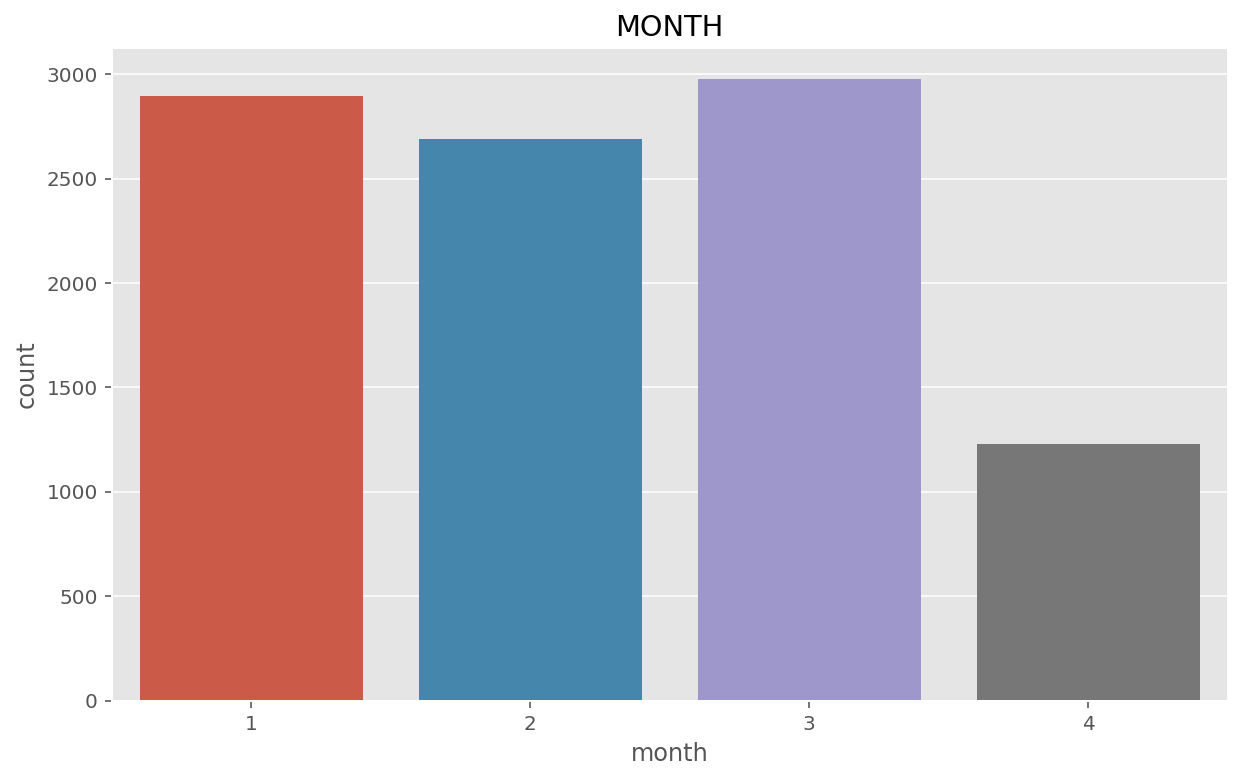

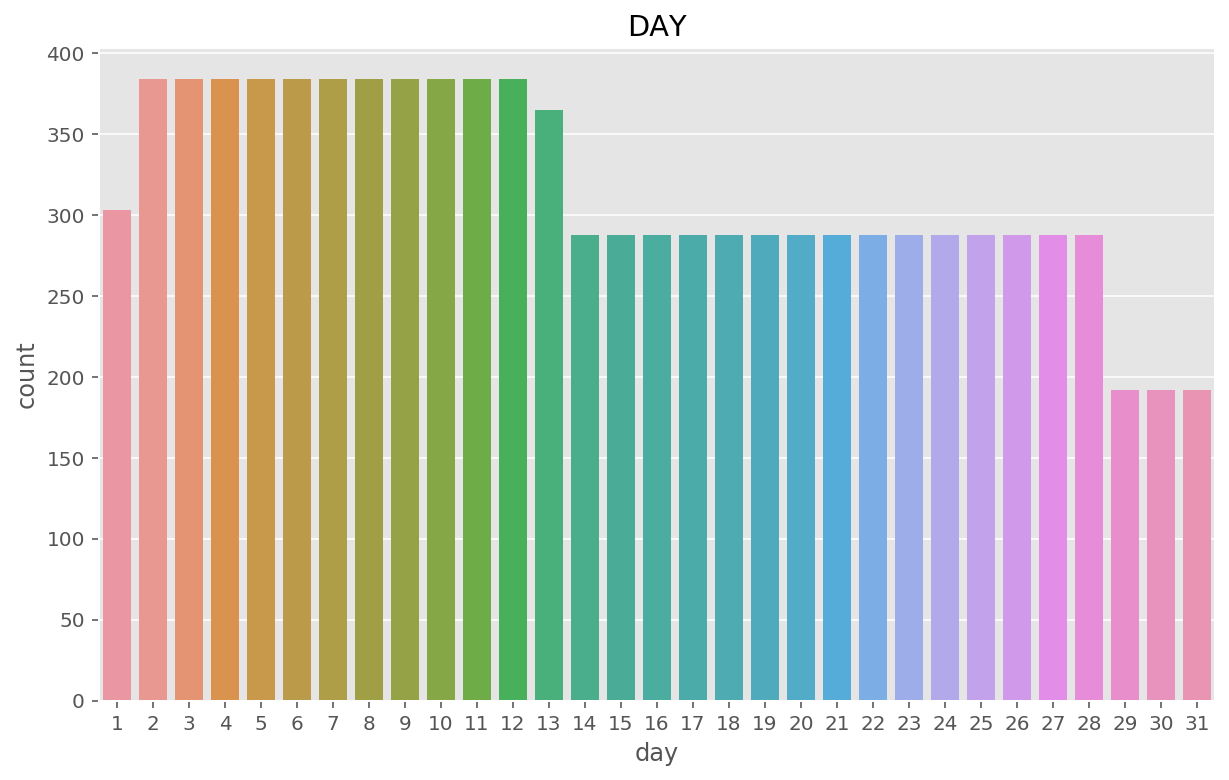

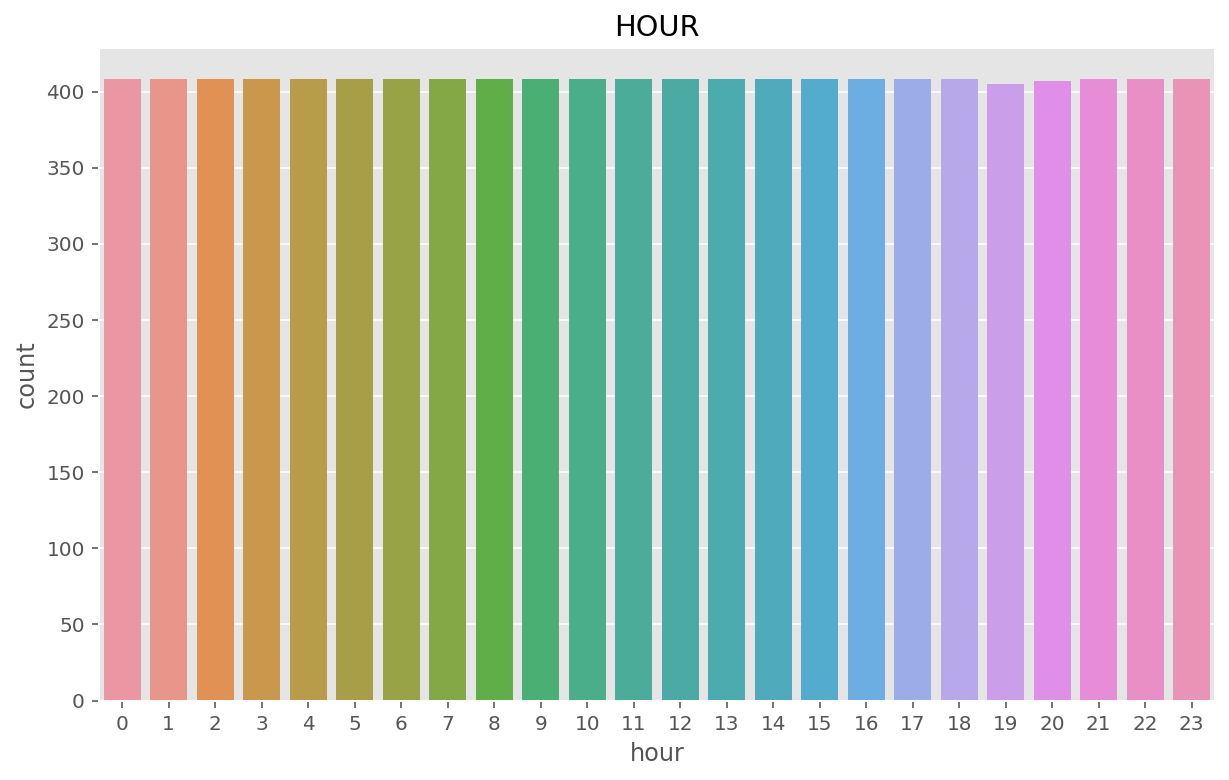

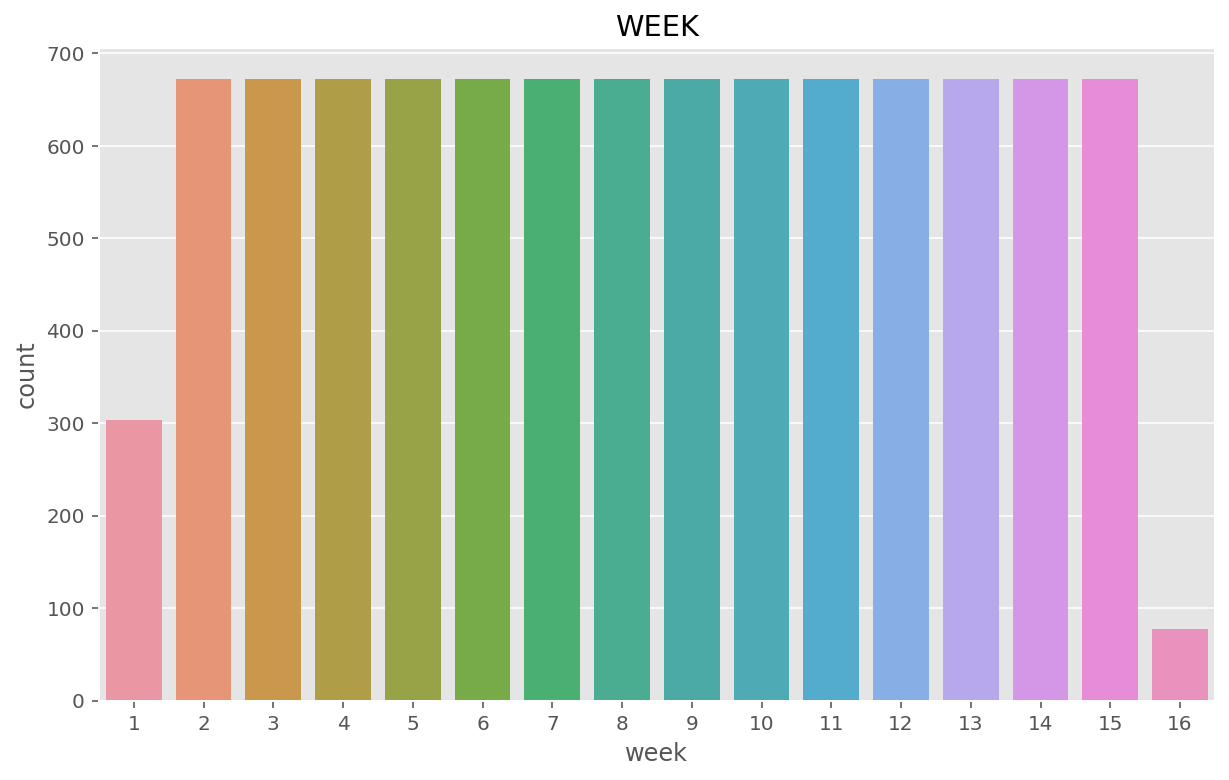

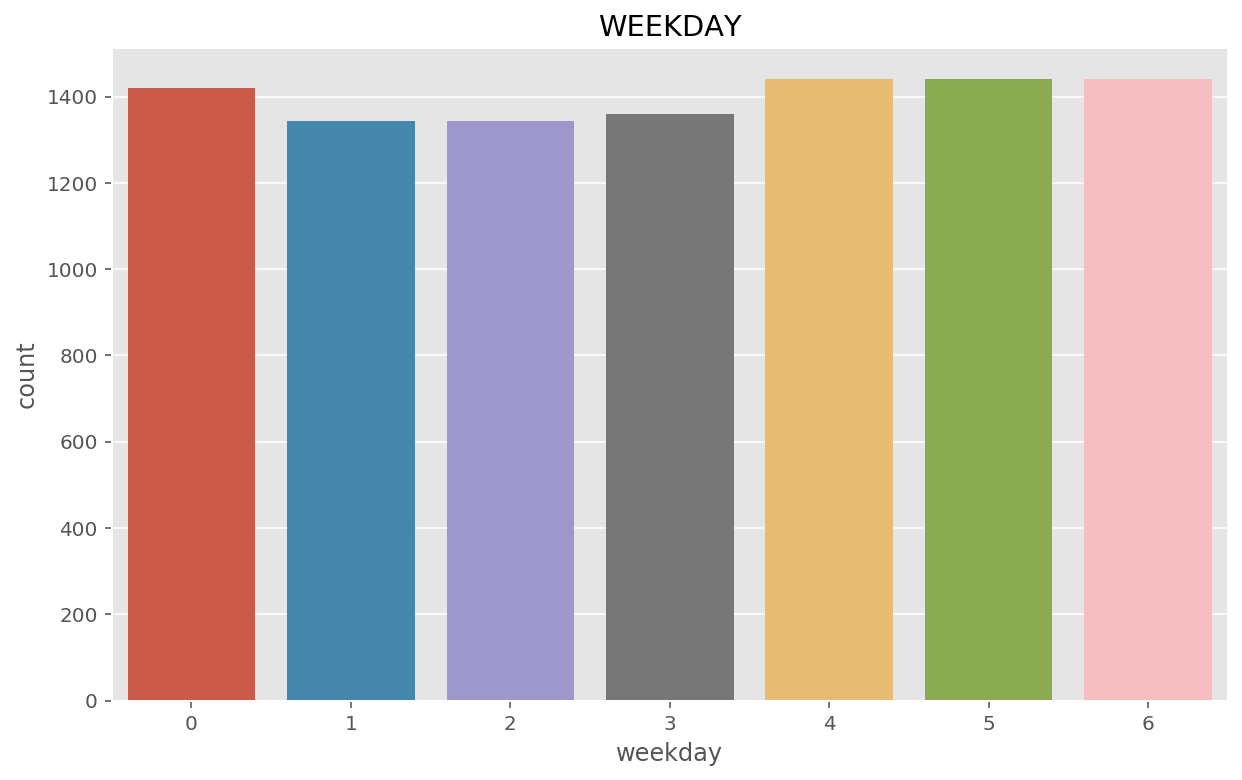

In [34]:
analysis.plot_month_day_hour(logins_df)

# _Observations_

The graphs above give us a great high-level overview of the breakdown by month, day and hour. Here are some quick insights we can gather from the graphs above:

- Number of logins steadily increased until the third month, and then dropped off rather suddenly in the fourth month (which is probably the result of observations only going to `4/13`)
- There looks to be more logins towards the beginning of the month than towards the end
- Logins by hour look to peak around noon and midnight 

Now let's resample the observations into 15-minute intervals to try and gain further insights.

# _Resample: 15 min Intervals_

In [91]:
interval_df = analysis.resample_15_min(logins_df)

interval_df.head()

KeyError: 'login_time'

In [66]:
interval_df.shape

(9788, 1)

In [67]:
interval_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 472.9 KB


In [69]:
interval_df.isnull().sum()

count    0
dtype: int64

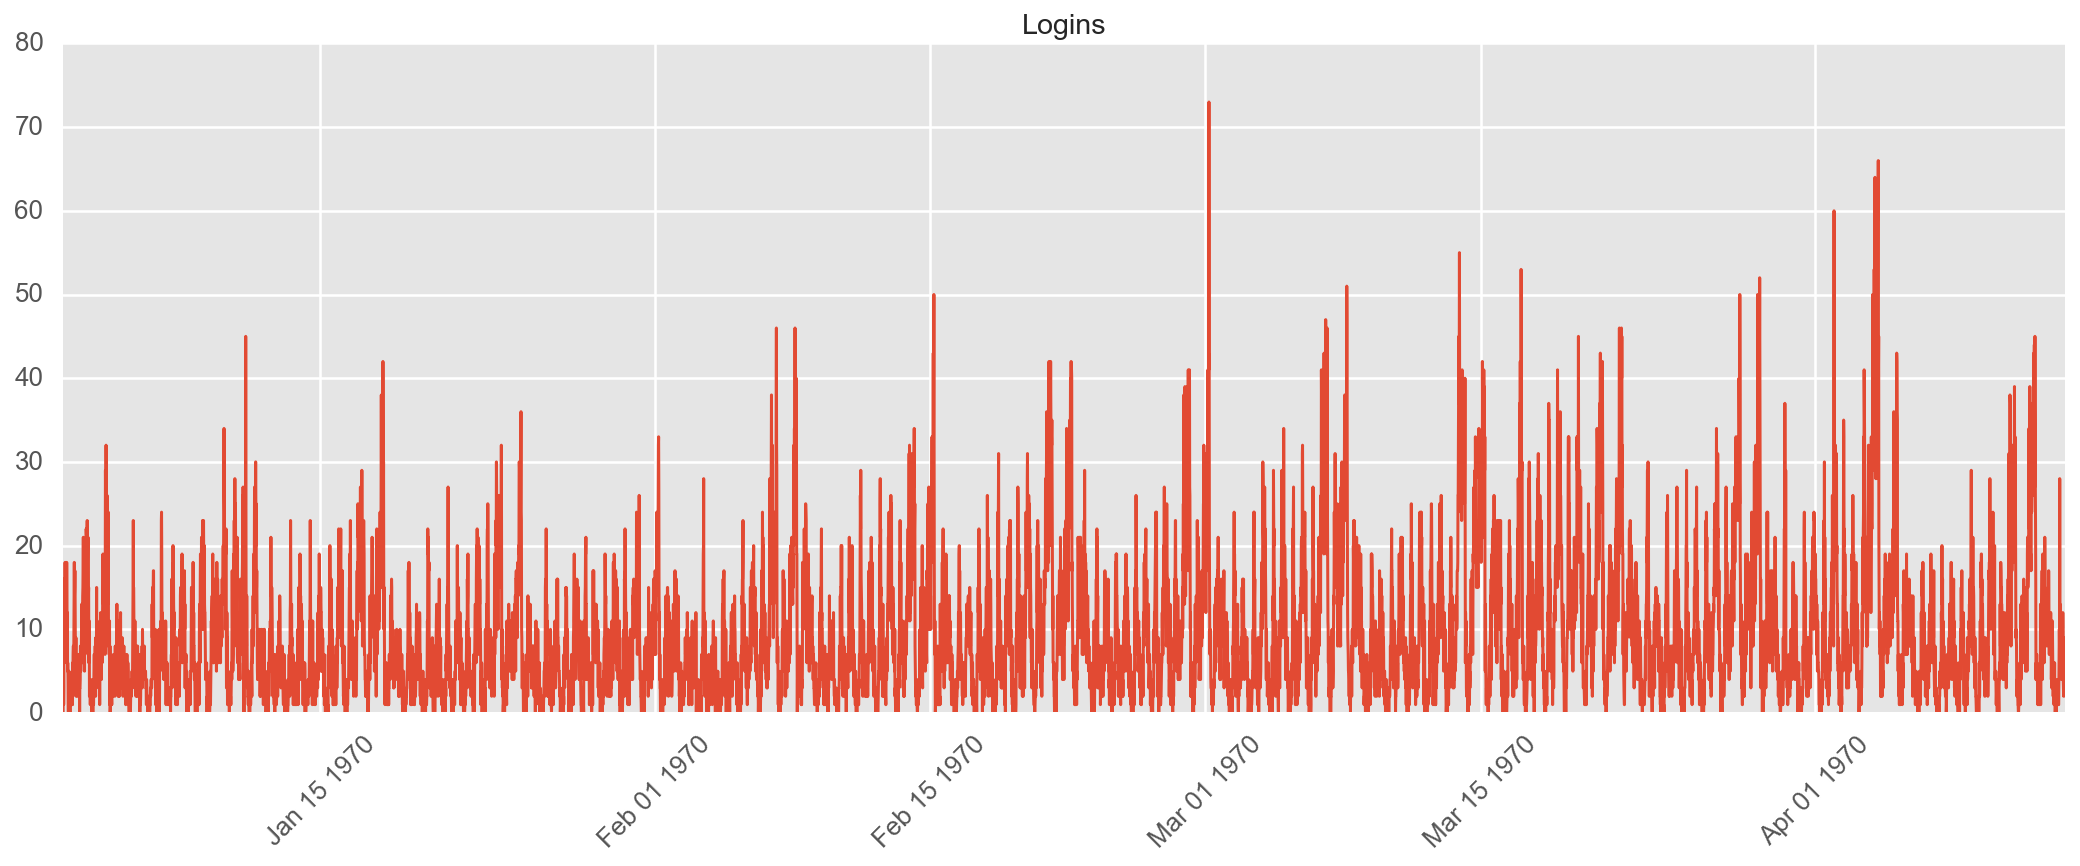

In [34]:
analysis.plot_series(interval_df)

# _Observations_

That didn't go as planned. While this graph provides little value, we can still see that there appear to be peak times in regards to logins, so it's not completely useless!

# _Separate Data into Months_

In [73]:
jan_df, feb_df, march_df, apr_df = analysis.month_dfs(interval_df)

In [79]:
jan_df = analysis.extract_data_info(jan_df)
feb_df = analysis.extract_data_info(feb_df)
march_df = analysis.extract_data_info(march_df)
apr_df = analysis.extract_data_info(apr_df)

In [80]:
jan_df.tail()

,login_time,count,month,day,hour,week,weekday
2891,1970-01-31 22:45:00,16,1,31,22,5,5
2892,1970-01-31 23:00:00,10,1,31,23,5,5
2893,1970-01-31 23:15:00,9,1,31,23,5,5
2894,1970-01-31 23:30:00,7,1,31,23,5,5
2895,1970-01-31 23:45:00,14,1,31,23,5,5


In [81]:
feb_df.tail()

,login_time,count,month,day,hour,week,weekday
2683,1970-02-28 22:45:00,20,2,28,22,9,5
2684,1970-02-28 23:00:00,23,2,28,23,9,5
2685,1970-02-28 23:15:00,27,2,28,23,9,5
2686,1970-02-28 23:30:00,17,2,28,23,9,5
2687,1970-02-28 23:45:00,18,2,28,23,9,5


In [82]:
march_df.tail()

,login_time,count,month,day,hour,week,weekday
2971,1970-03-31 22:45:00,21,3,31,22,14,1
2972,1970-03-31 23:00:00,24,3,31,23,14,1
2973,1970-03-31 23:15:00,23,3,31,23,14,1
2974,1970-03-31 23:30:00,23,3,31,23,14,1
2975,1970-03-31 23:45:00,14,3,31,23,14,1


In [83]:
apr_df.tail()

,login_time,count,month,day,hour,week,weekday
1223,1970-04-13 17:45:00,5,4,13,17,16,0
1224,1970-04-13 18:00:00,5,4,13,18,16,0
1225,1970-04-13 18:15:00,2,4,13,18,16,0
1226,1970-04-13 18:30:00,7,4,13,18,16,0
1227,1970-04-13 18:45:00,6,4,13,18,16,0


# _January Analysis_

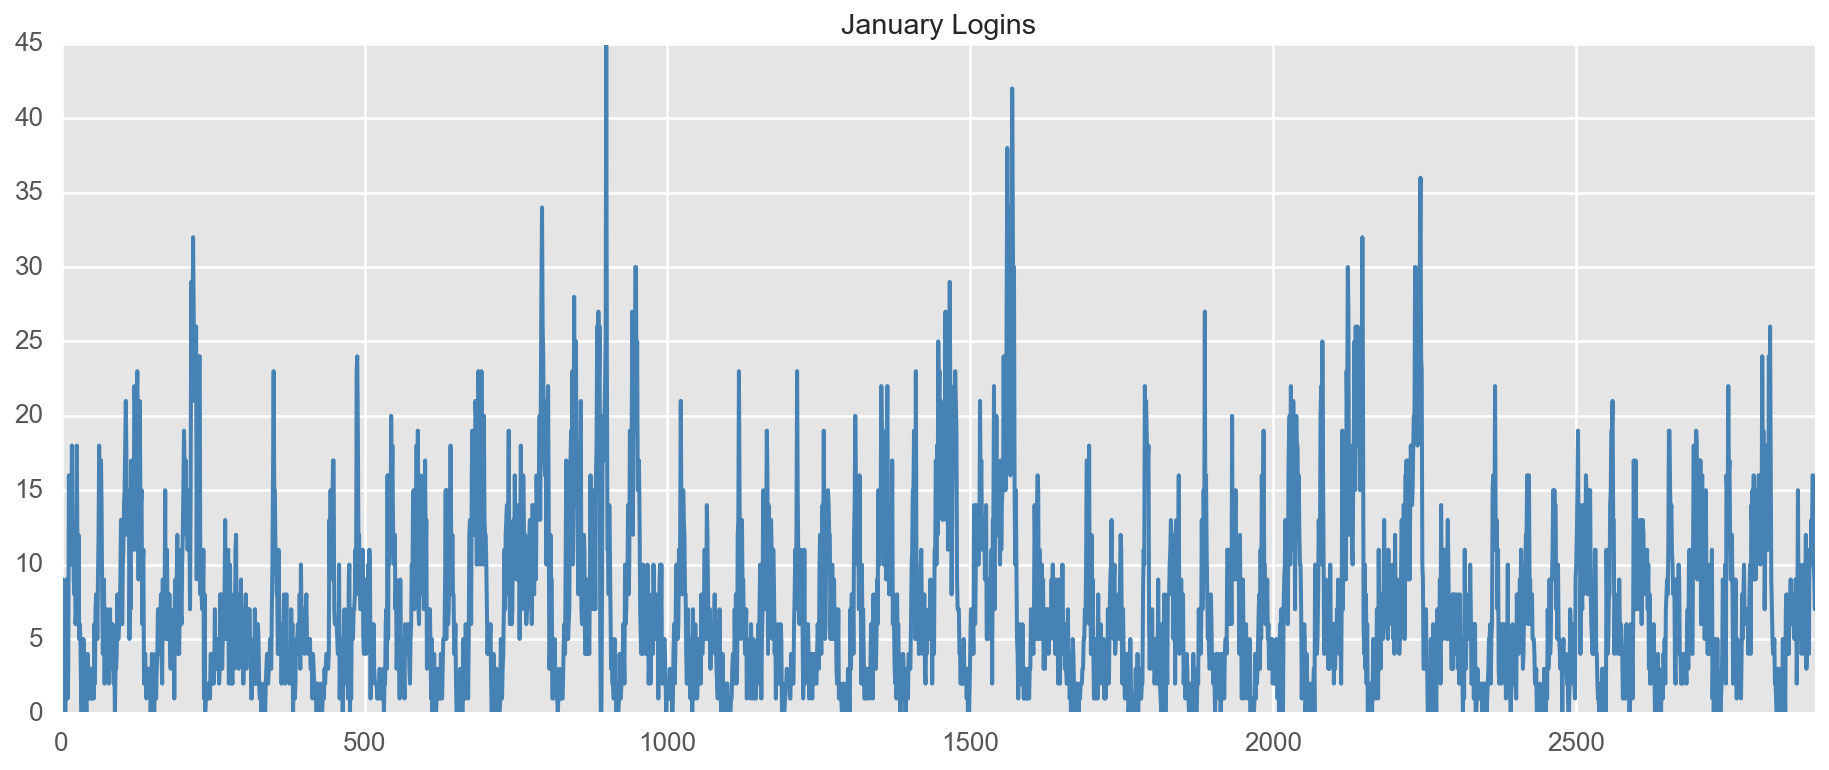

In [84]:
jan_df['count'].plot(figsize=(14,6), linewidth=2, legend=False, title='January Logins', color='steelblue');

# _Observations_

So this is a little more informative than our original plot from above. First, we get to see the trend in number of logins over just the month of January; second, we can pick up that there appear to be four spikes in the number of logins. 

I have a hunch that these spikes are weekends so next we'll try to breakdown the analysis into days of the week.

In [85]:
for df in [jan_df, feb_df, march_df, apr_df]:
    df.info()
    print('-' * 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 7 columns):
login_time    2896 non-null datetime64[ns]
count         2896 non-null int64
month         2896 non-null int64
day           2896 non-null int64
hour          2896 non-null int64
week          2896 non-null int64
weekday       2896 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 158.5 KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 7 columns):
login_time    2688 non-null datetime64[ns]
count         2688 non-null int64
month         2688 non-null int64
day           2688 non-null int64
hour          2688 non-null int64
week          2688 non-null int64
weekday       2688 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 147.1 KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 7 columns):
login_ti